# WE BAND

In [2]:
%matplotlib inline
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

c:\python3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\python3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Meeting the Data

In [28]:
data = pd.read_csv("HeartDiseaseCombine1.csv")

In [18]:
data.shape

(410322, 30)

In [19]:
data.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF,LF_NU,HF,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,levels
count,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,...,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000
mean,846.670724,841.980595,109.302941,14.978707,14.977976,7.393869,73.937573,9.845863,0.865656,10.594563,...,946.762416,95.568707,39.222254,4.431293,3185.252565,116.097645,0.048481,2.062585,1.182327,0.631777
std,124.585711,132.286414,77.065738,4.122602,4.122605,5.144097,10.335769,8.202293,0.989847,2.916095,...,574.496501,4.121246,45.358572,4.121246,1923.256646,361.579695,0.049200,0.207042,0.062222,0.761208
min,547.483802,517.293295,27.233947,5.529742,5.529630,2.660381,48.736986,0.000000,0.000000,3.911344,...,90.048557,69.879083,0.061783,0.012825,377.692795,2.319952,0.000128,0.434576,1.033984,0.000000
25%,760.243974,755.749505,64.196632,11.831264,11.831056,4.539551,66.707281,3.666667,0.000000,8.368612,...,545.347453,93.646845,10.705803,1.225656,1827.162419,14.740211,0.012409,2.033147,1.139945,0.000000
50%,822.916027,819.669975,82.624288,14.417202,14.416616,5.950217,74.217815,7.600000,0.466667,10.197489,...,782.839482,96.644490,24.827923,3.355510,2797.183719,28.801728,0.034720,2.134297,1.174310,0.000000
75%,924.220881,917.009455,118.193410,17.931444,17.929922,7.918086,80.330105,13.333333,1.400000,12.682600,...,1202.275845,98.774344,45.249947,6.353155,4052.547021,80.588979,0.067842,2.181977,1.223704,1.000000
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.754253,39.400000,5.466667,18.836107,...,3291.548112,99.987175,364.486936,30.120917,13390.684100,7796.443096,0.431043,2.234841,1.361219,2.000000


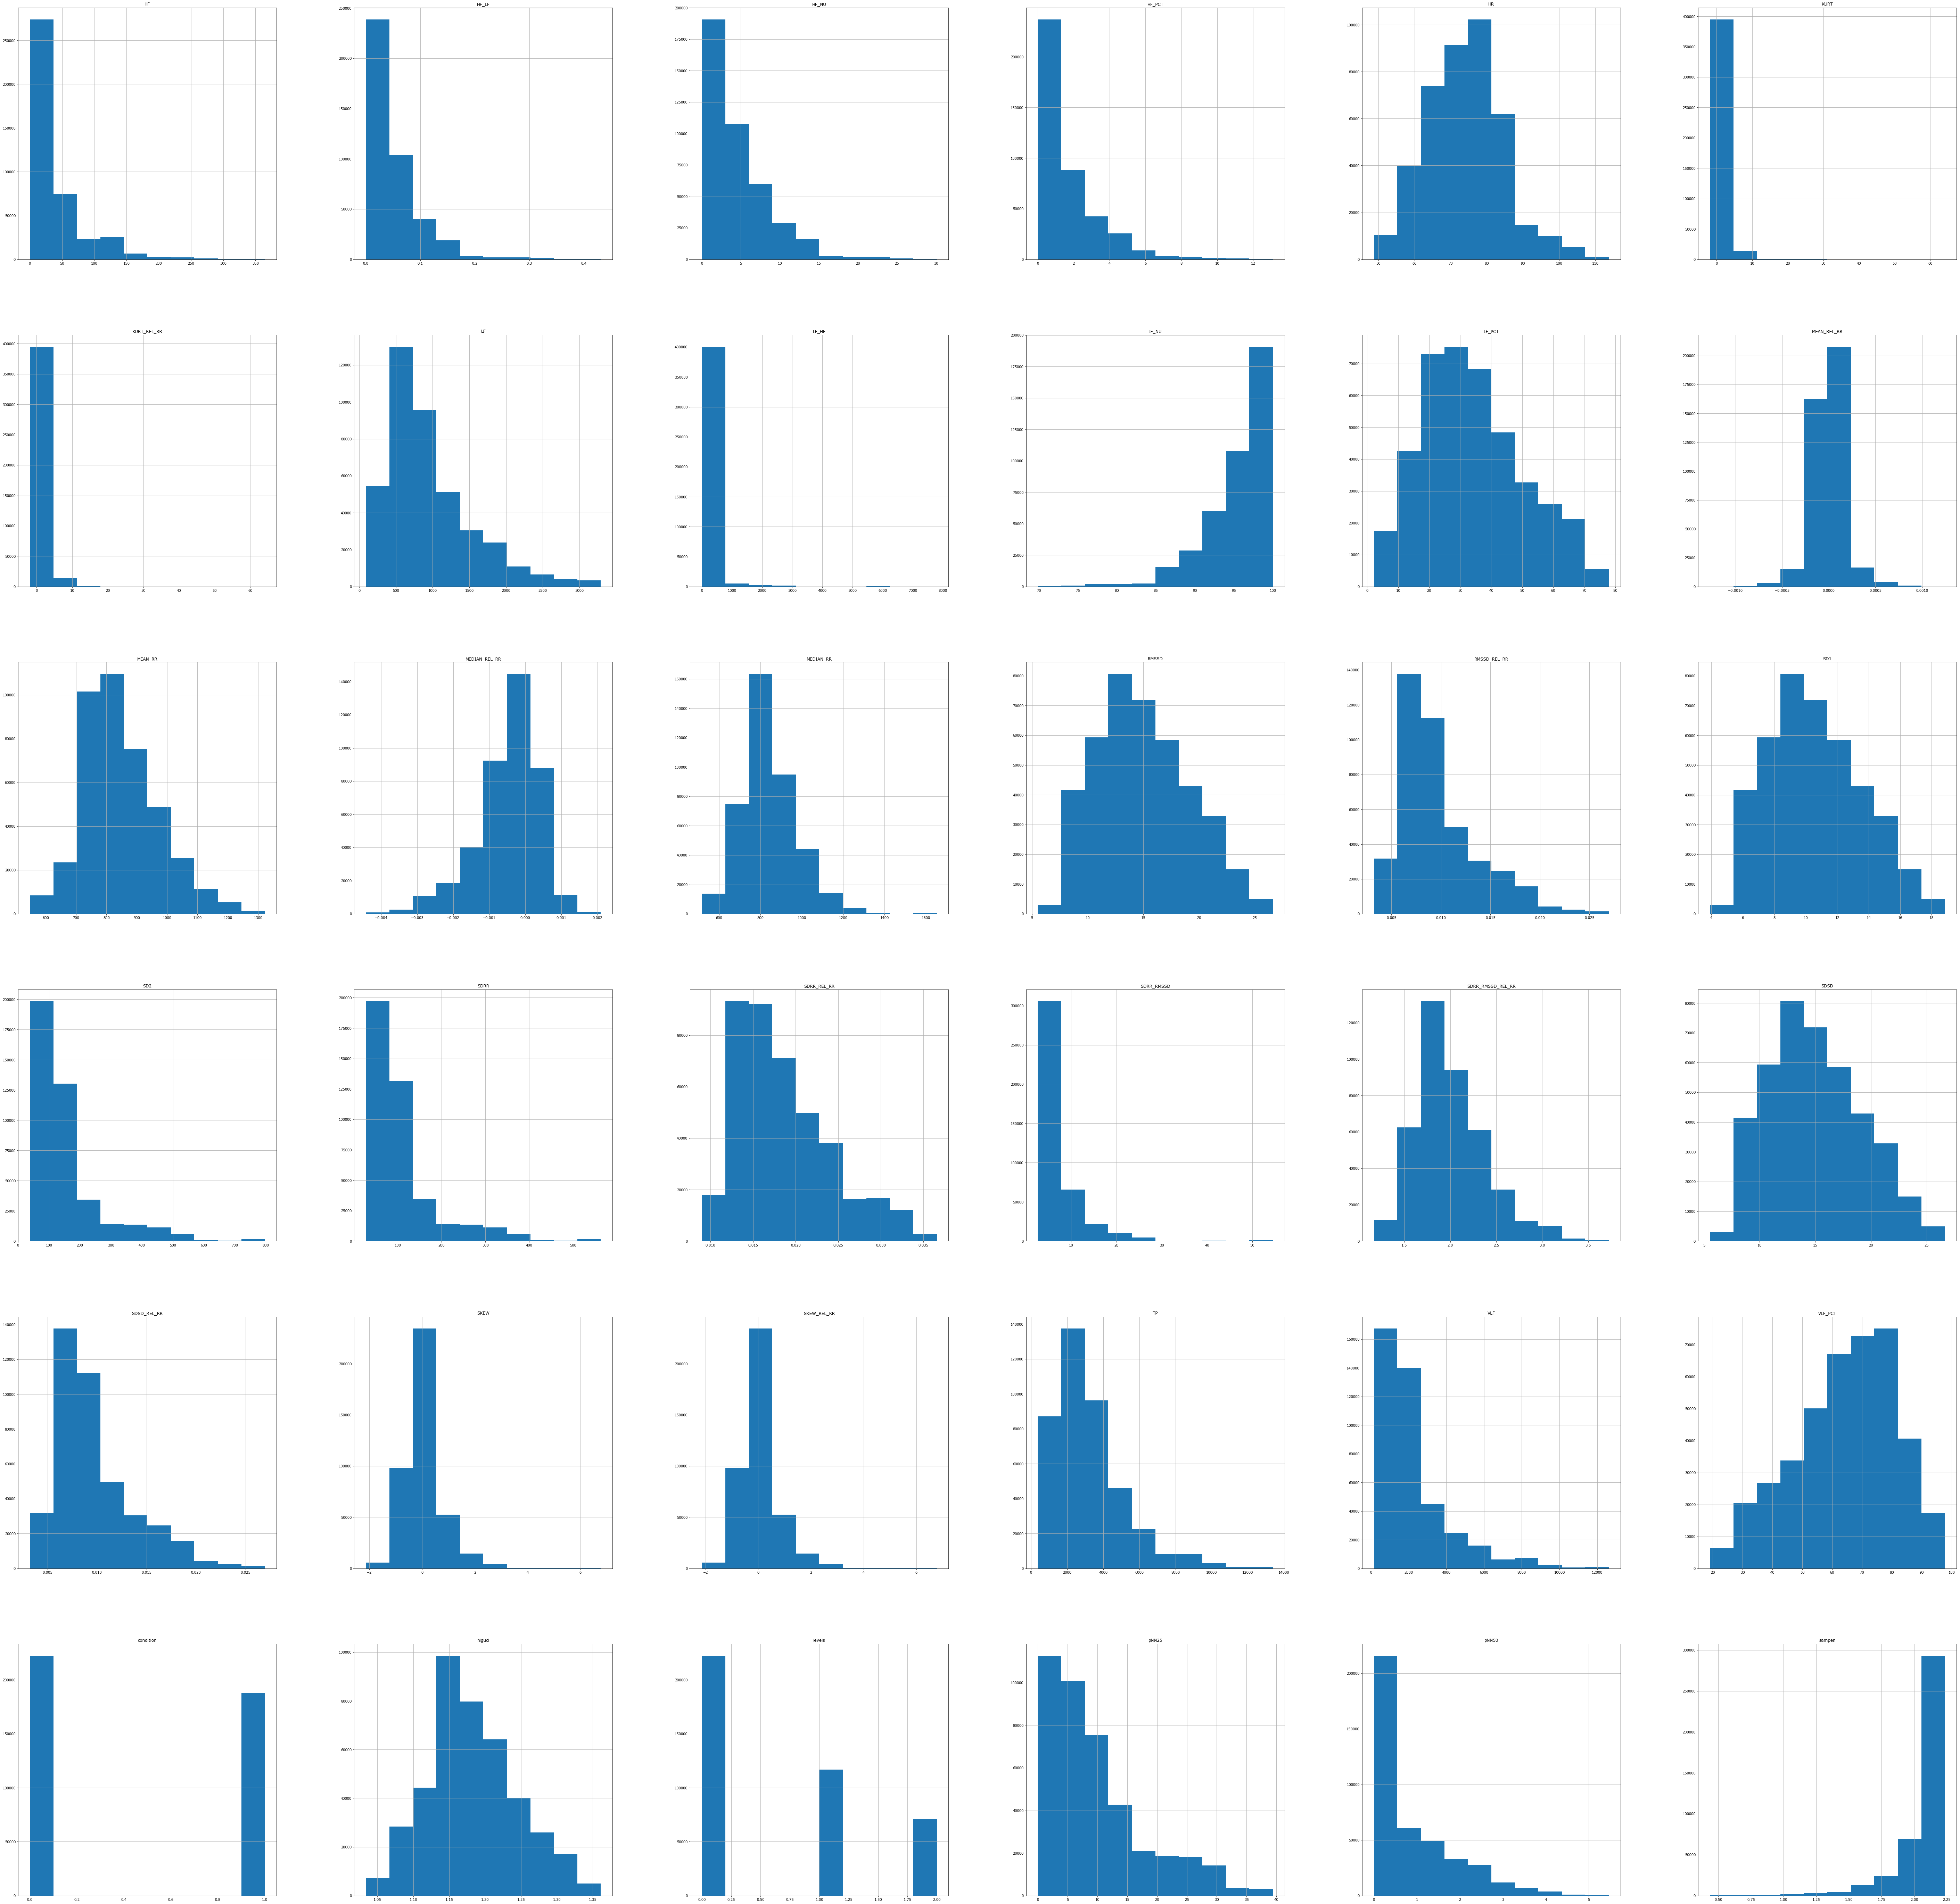

In [8]:

data.hist()
fig = plt.gcf()
fig.set_size_inches(100,100)

plt.show()

## Algorithms

In [62]:
new_data = data.iloc[:500]

In [63]:
y = new_data['levels']
new_data = new_data.drop(['levels'], axis=1)


In [64]:
import matplotlib.pyplot as plt
X = new_data


X.shape: (500, 29)


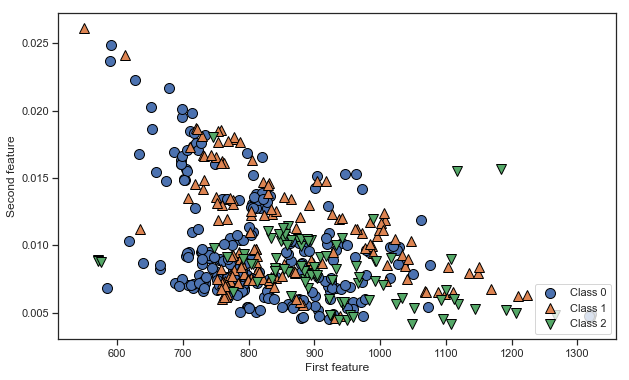

In [69]:
mglearn.discrete_scatter(X.iloc[:,0], X.iloc[:,16], y)
plt.legend(["Class 0", "Class 1", "Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
fig = plt.gcf()
fig.set_size_inches(10, 6, forward=True)
print("X.shape: {}".format(X.shape))

# KNN

In [70]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("HeartDiseaseCombine.csv")
y = data['levels']
X = data.drop(['levels'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 100)
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [72]:
clf.score(X_test, y_test)

0.9309119912559912

In [73]:
clf.score(X_train, y_train)

0.9331356964880054

In [74]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 25, 5)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    

## Increasing neighbors count

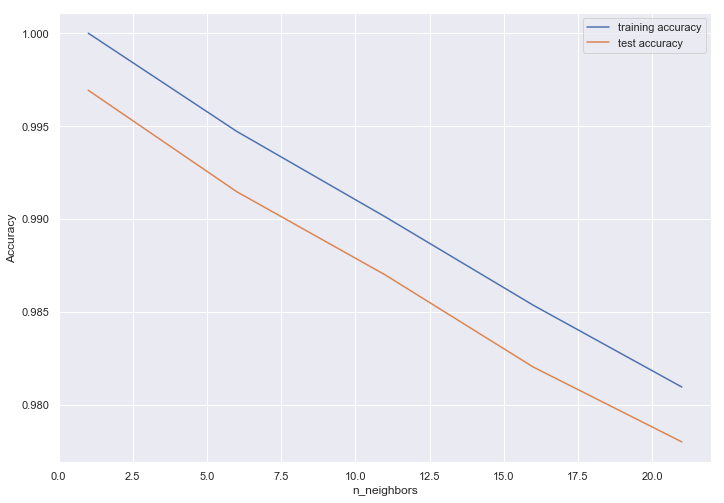

In [75]:
%matplotlib inline
import seaborn as sns; sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier

cancer = pd.read_csv('HeartDiseaseCombine.csv')
y = data['levels']
X = data.drop(['levels'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(
X,y, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.897
Accuracy on test set: 0.898


In [27]:
X.keys()

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'condition'],
      dtype='object')

## Random Forests

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [6]:
data = pd.read_csv('HeartDiseaseCombine.csv')
y = data['levels']
X = data.drop(['levels'], axis =1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

regressor = RandomForestRegressor(10, random_state = 0)
regressor.fit(x_train, y_train)
regressor.score(x_train, y_train)
regressor.fit(x_test, y_test)
regressor.score(x_test, y_test)

0.9999689641858714

## SVC

In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv("HeartDiseaseCombine.csv")
y=df['levels']
X=df.drop('levels',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
      .format(svm.score(X_test, y_test)))

c:\python3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Logistic Regression

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("HeartDiseaseCombine.csv")
y = df['levels']
X= df.drop('levels', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
print('Accuracy provided by logistic regression : {:.2f}'
        .format(accuracy_score(y_test , y_pred)))

c:\python3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy provided by logistic regression : 0.89
